In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from azureml import Workspace
ws = Workspace(
    workspace_id='bbc0f7b3b64843179da5e569144550aa',
    authorization_token='iNjA9YbRxZiG/fAqpTWW6qprqTldqAkTGbvnuGX3yMjrgEzgpNHY4bkHhAZ/x7xvixWPG9i6SdC77Vk35+CFrw==',
    endpoint='https://europewest.studioapi.azureml.net'
)

%matplotlib inline
plt.style.use('ggplot')

ds = ws.datasets['train_values.csv']
X_train = ds.to_dataframe()

ds = ws.datasets['train_labels.csv']
y_train = ds.to_dataframe()

ds = ws.datasets['test_values.csv']
X_test = ds.to_dataframe()

X_train = X_train.set_index('row_id')
y_train = y_train.set_index('row_id')
X_test = X_test.set_index('row_id')

def fixCategoricalData(df):
    df['school__degrees_awarded_highest'] = df['school__degrees_awarded_highest'].astype("category", categories=["Non-degree-granting", "Certificate degree", "Associate degree", "Bachelor's degree", "Graduate degree"], ordered=True)
    df['school__degrees_awarded_predominant'] = df['school__degrees_awarded_predominant'].astype("category", categories=["Not classified", "Predominantly certificate-degree granting", "Predominantly associate's-degree granting", "Predominantly bachelor's-degree granting", "Entirely graduate-degree granting"], ordered=True)
    df['school__institutional_characteristics_level'] = df['school__institutional_characteristics_level'].astype("category", categories=["2-year", "4-year", "Less-than-2-year"])
    df['school__ownership'] = df['school__ownership'].astype("category", categories=["Public", "Private for-profit", "Private nonprofit"])
    df['school__region_id'] = df['school__region_id'].astype("category", categories=["Plains (IA, KS, MN, MO, NE, ND, SD)", "New England (CT, ME, MA, NH, RI, VT)", "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)", "Mid East (DE, DC, MD, NJ, NY, PA)", "Great Lakes (IL, IN, MI, OH, WI)", "Far West (AK, CA, HI, NV, OR, WA)", "Southwest (AZ, NM, OK, TX)", "Rocky Mountains (CO, ID, MT, UT, WY)", "Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"])
    df['school__state'] = df['school__state'].astype("category",categories=["axc", "fga", "oly", "dmg", "hbt", "jgn", "kll", "xve", "dfy", "oon", "oli", "iqy", "qim", "shi", "ccg", "dkf", "ipu", "tbs", "luw", "pxv", "hww", "lff", "slp", "wjh", "idw", "ezv", "vvi", "zdl", "jsu", "hks", "bww", "fxt", "rxy", "cfi", "rse", "kus", "oub", "uah", "rya", "eyi", "wto", "gkt", "bkc", "znt", "slo", "hqy", "rgs", "cmz", "kdg", "pdh", "ahh", "twr", "xws", "por", "uuo", "nhl", "hmr", "jfm"])
    df['school__main_campus'] = df['school__main_campus'].astype("category", categories=["Main campus", "Not main campus"])
    df['school__online_only'] = df['school__online_only'].astype("category", categories=["Not distance-education only", "nan", "Distance-education only"])
    return df

X_train = fixCategoricalData(X_train)
X_test = fixCategoricalData(X_test)

df = pd.concat([X_train, y_train], axis=1)

print ("Dataset:", df.shape)
df.head(10)

Dataset: (17107, 298)


,academics__program_assoc_agriculture,academics__program_assoc_architecture,academics__program_assoc_biological,academics__program_assoc_business_marketing,academics__program_assoc_communication,academics__program_assoc_communications_technology,academics__program_assoc_computer,academics__program_assoc_construction,academics__program_assoc_education,academics__program_assoc_engineering,...,student__retention_rate_lt_four_year_part_time,student__share_25_older,student__share_first_time_full_time,student__share_firstgeneration,student__share_firstgeneration_parents_highschool,student__share_firstgeneration_parents_middleschool,student__share_firstgeneration_parents_somecollege,student__share_independent_students,student__size,income
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728395,56.0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.3304,0.4952,0.425287,NaN,NaN,0.574713,0.323077,314.0,26.7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9000,0.5135,NaN,0.466667,0.436111,NaN,0.533333,0.805486,148.0,28.1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.2410,0.5645,0.293761,0.278163,NaN,0.706239,0.333607,1995.0,41.6
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.7827,0.408736,0.400347,NaN,0.591264,0.083424,6654.0,34.3
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.4773,0.3781,0.3089,0.488539,0.436963,NaN,0.511461,0.566295,1253.0,23.2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.7
14,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,NaN,0.2182,0.6331,0.318660,0.307287,NaN,0.681340,0.330614,11097.0,32.9
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.6259,NaN,0.527646,0.459716,NaN,0.472354,0.782443,147.0,25.7


Let's look at the features we have in the dataset by category.
We'll create a few helper functions to filter and analyze our dataset

In [2]:
def filterOnCategory(df, category):
    filter_col = [col for col in df if col.startswith(category)]
    return df.loc[:, filter_col]

def showCorrMatrix(df):
    # admissions
    matrix = df.corr()
    
    plt.imshow(matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = [i for i in range(len(df.columns))]
    plt.xticks(tick_marks, df.columns, rotation='vertical')
    plt.yticks(tick_marks, df.columns)

    plt.show()
    return matrix
    
#return a formatted percentage from a fraction
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")

def showFeatureCompleteness(df):
    print (percentage(df.count()-1, df.shape[0]-1))
    
def getLowRepresentedFeatures(df, percentage):
    list = []
    for x in df.columns:
        if df[x].count()-1 < df.shape[0] * percentage:
            list.append(x)
    return list

### Admissions Features

In [3]:
admissions = filterOnCategory(df, 'admissions')

showFeatureCompleteness(admissions)
admissions.head(5)

admissions__act_scores_25th_percentile_cumulative          21.6%
admissions__act_scores_25th_percentile_english             18.3%
admissions__act_scores_25th_percentile_math                18.3%
admissions__act_scores_25th_percentile_writing              2.5%
admissions__act_scores_75th_percentile_cumulative          21.6%
admissions__act_scores_75th_percentile_english             18.3%
admissions__act_scores_75th_percentile_math                18.3%
admissions__act_scores_75th_percentile_writing              2.5%
admissions__act_scores_midpoint_cumulative                 21.6%
admissions__act_scores_midpoint_english                    18.3%
admissions__act_scores_midpoint_math                       18.3%
admissions__act_scores_midpoint_writing                     2.5%
admissions__admission_rate_by_ope_id                       43.7%
admissions__admission_rate_overall                         39.0%
admissions__sat_scores_25th_percentile_critical_reading    20.9%
admissions__sat_scores_25

,admissions__act_scores_25th_percentile_cumulative,admissions__act_scores_25th_percentile_english,admissions__act_scores_25th_percentile_math,admissions__act_scores_25th_percentile_writing,admissions__act_scores_75th_percentile_cumulative,admissions__act_scores_75th_percentile_english,admissions__act_scores_75th_percentile_math,admissions__act_scores_75th_percentile_writing,admissions__act_scores_midpoint_cumulative,admissions__act_scores_midpoint_english,...,admissions__sat_scores_25th_percentile_math,admissions__sat_scores_25th_percentile_writing,admissions__sat_scores_75th_percentile_critical_reading,admissions__sat_scores_75th_percentile_math,admissions__sat_scores_75th_percentile_writing,admissions__sat_scores_average_by_ope_id,admissions__sat_scores_average_overall,admissions__sat_scores_midpoint_critical_reading,admissions__sat_scores_midpoint_math,admissions__sat_scores_midpoint_writing
row_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,19.0,19.0,NaN,25.0,25.0,26.0,NaN,23.0,22.0,...,453.0,NaN,568.0,578.0,NaN,1048.0,1048.0,504.0,516.0,NaN
5,17.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,20.0,NaN,...,440.0,420.0,530.0,550.0,520.0,975.0,975.0,485.0,495.0,470.0


From here we see that data is mostly incomplete although this seems a good candidate to help predict income. Given the amount of missing data, we need to determine how we will approach this. There are basically two ways we can think about this:
- Remove all missing data
- Fill that missing data with some value

But first let's try and look at the actual data in it and how it correlates. There are a number of metrics for SAT scores, another set for ACT scores and finallay Admission Rate information. So we can further split this into these 3 groups.

In [4]:
ACT = filterOnCategory(admissions, 'admissions__act_scores')
SAT = filterOnCategory(admissions, 'admissions__sat_scores')
ADMISSION_RATE = filterOnCategory(admissions, 'admissions__admission_rate')

### Looking at ACT data

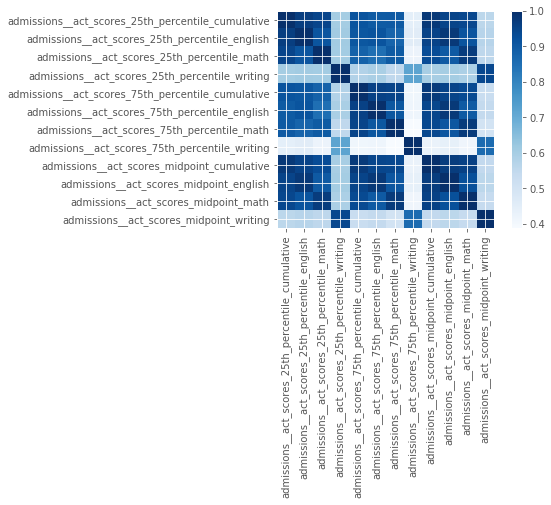

In [5]:
matrix = showCorrMatrix(ACT)

This clearly shows a few clusters of correlation. On each percentile (25th, 75th and midpoint) the individual scores are highly correlated to the cumulative score (expect for the writing score in each cluster). The percentiles are also correlated between themselves so we have a good chance of reducing this to the midpoint data.

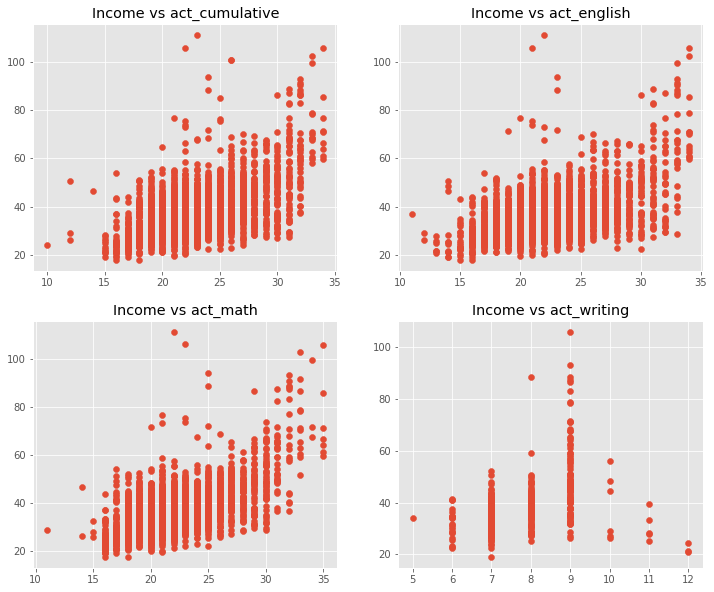

act_cumulative     21.6%
act_english        18.3%
act_math           18.3%
act_writing         2.5%
income            100.0%
dtype: object


In [6]:
ACT_midpoints = filterOnCategory(ACT, 'admissions__act_scores_midpoint')
ACT_midpoints.columns = ['act_cumulative', 'act_english', 'act_math', 'act_writing']

ACT_midpoints['income'] = y_train['income']

i = 0
fig = plt.figure(figsize=(12,10))
for x in ACT_midpoints.columns[:-1]:
    ax = fig.add_subplot(2,2,i%4+1)
    ax.scatter(ACT_midpoints[x], y_train['income'], label=x)
    ax.set_title("Income vs " + str(x))
    i += 1
    
plt.show()

showFeatureCompleteness(ACT_midpoints)

There doesn't seem to be a significant different between individual scores and cumulative. The writing score doesn't seem to have any relationship with income at all. Besides, it's a very low represented feature so we'll definetely remove this.
The cumulative score is very correlated to other scores and seems to be the most complete one, although it's only present on 21.6% of all data.

#### Conclusion: from ACT data, we probably only want to look at
- admissions__act_scores_midpoint_cumulative

### Looking at SAT data

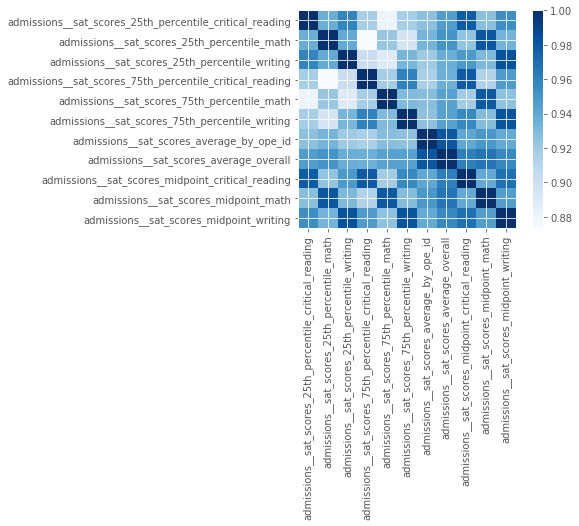

In [7]:
matrix = showCorrMatrix(SAT)

Even higher values here for correlation (notice the scale goes from 0.885 to 1) and there doesn't seem to be any significant outliers in correlation (like the writing ACT score on the previous analysis). We can probably focus just on the the midpoints and might even settle on the average

admissions__sat_scores_average_by_ope_id            25.4%
admissions__sat_scores_average_overall              23.5%
admissions__sat_scores_midpoint_critical_reading    20.9%
admissions__sat_scores_midpoint_math                21.2%
admissions__sat_scores_midpoint_writing             11.6%
dtype: object


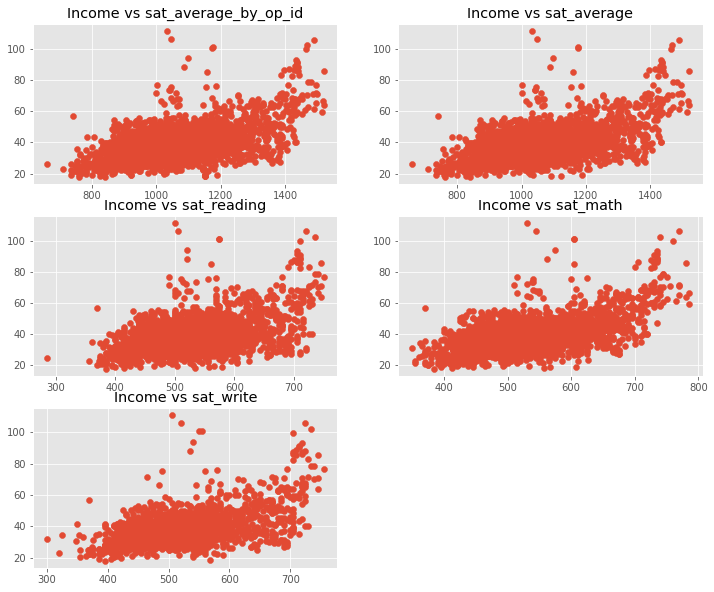

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

SAT_midpoints = SAT.iloc[:,-5:]
showFeatureCompleteness(SAT_midpoints)

SAT_midpoints.columns = ['sat_average_by_op_id', 'sat_average', 'sat_reading', 'sat_math', 'sat_write']

SAT_midpoints['income'] = y_train['income']

i = 0
fig = plt.figure(figsize=(12,10))
for x in SAT_midpoints.columns[:-1]:
    ax = fig.add_subplot(3,2,i%5+1)
    ax.scatter(SAT_midpoints[x], y_train['income'], label=x)
    ax.set_title("Income vs " + str(x))
    i += 1
    
plt.show()

We are interested in one of the average values, but which one? Let's see if the are the same.

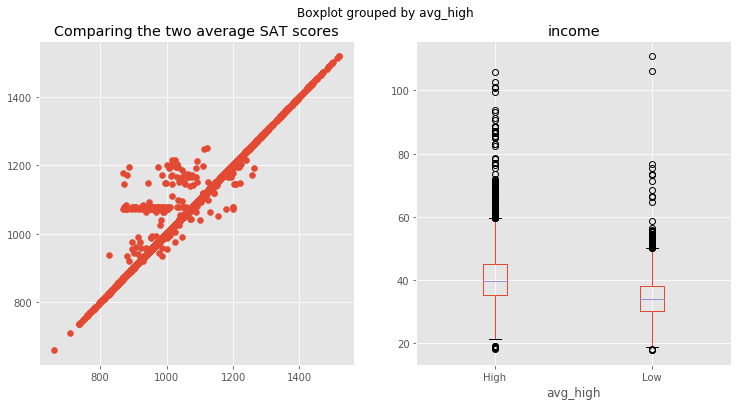

In [9]:
fig = plt.figure(figsize=(12,6));
ax = fig.add_subplot(121)

ax.scatter(SAT_midpoints['sat_average'],SAT_midpoints['sat_average_by_op_id'])
ax.set_title('Comparing the two average SAT scores')

temp = SAT_midpoints.dropna(subset=['sat_average_by_op_id'], axis=0)
temp['avg_high'] = np.where(temp['sat_average_by_op_id'] > temp['sat_average_by_op_id'].mean(), 'High', 'Low')
temp['income'] = y_train.income

ax2 = fig.add_subplot(122)
ax2.set_title('')
temp.boxplot(column = 'income', by = 'avg_high', ax = ax2)

plt.show()

Scores are basically the same. We'll choose the one which is more represented. The boxplot on the righ shows the distribution of 
income between graduates with higher and lower sat scores

#### Conclusion: from ACT data, we probably only want to look at
- admissions__sat_scores_average_by_ope_id

### Looking at Admission Rate data

admissions__admission_rate_by_ope_id     43.7%
admissions__admission_rate_overall       39.0%
income                                  100.0%
dtype: object


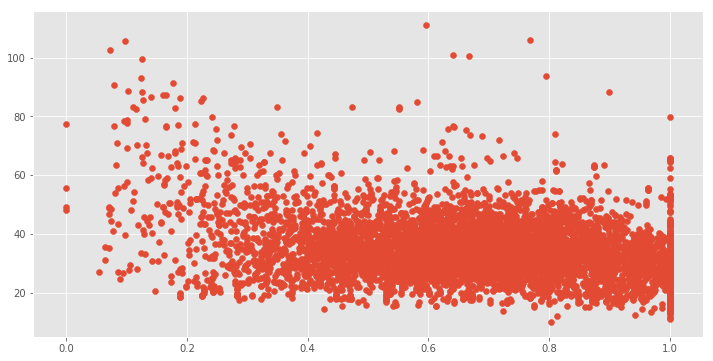

In [10]:
ADMISSION_RATE['income'] = y_train['income']

fig = plt.figure(figsize=(12,6));
ax = fig.add_subplot(111)

showFeatureCompleteness(ADMISSION_RATE)

ax.scatter(ADMISSION_RATE['admissions__admission_rate_by_ope_id'],ADMISSION_RATE['income'])
plt.show()

No real relationship seems to exist on this. Different analysis doing PCA reveals admission rate to be one of the least significant features.

## School features

In [11]:
school = filterOnCategory(df, 'school')

print (school.dtypes)
showFeatureCompleteness(school)
school.head(10)


school__degrees_awarded_highest                category
school__degrees_awarded_predominant            category
school__degrees_awarded_predominant_recoded       int64
school__faculty_salary                          float64
school__ft_faculty_rate                         float64
school__institutional_characteristics_level    category
school__instructional_expenditure_per_fte       float64
school__main_campus                            category
school__online_only                            category
school__ownership                              category
school__region_id                              category
school__state                                  category
school__tuition_revenue_per_fte                 float64
dtype: object
school__degrees_awarded_highest                100.0%
school__degrees_awarded_predominant            100.0%
school__degrees_awarded_predominant_recoded    100.0%
school__faculty_salary                          66.2%
school__ft_faculty_rate                   

,school__degrees_awarded_highest,school__degrees_awarded_predominant,school__degrees_awarded_predominant_recoded,school__faculty_salary,school__ft_faculty_rate,school__institutional_characteristics_level,school__instructional_expenditure_per_fte,school__main_campus,school__online_only,school__ownership,school__region_id,school__state,school__tuition_revenue_per_fte
row_id,,,,,,,,,,,,,
0,Certificate degree,Predominantly certificate-degree granting,1,NaN,NaN,2-year,8294.0,Not main campus,Not distance-education only,Private nonprofit,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",slp,7736.0
1,Bachelor's degree,Predominantly bachelor's-degree granting,3,5742.0,0.4583,4-year,2794.0,Main campus,Not distance-education only,Private nonprofit,"New England (CT, ME, MA, NH, RI, VT)",iqy,11199.0
3,Certificate degree,Predominantly certificate-degree granting,1,NaN,NaN,Less-than-2-year,1781.0,Main campus,NaN,Private for-profit,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",oon,15404.0
4,Graduate degree,Predominantly bachelor's-degree granting,3,5514.0,0.3258,4-year,4714.0,Main campus,Not distance-education only,Private nonprofit,"Plains (IA, KS, MN, MO, NE, ND, SD)",znt,11847.0
5,Graduate degree,Predominantly bachelor's-degree granting,3,9163.0,0.7701,4-year,7682.0,Main campus,Not distance-education only,Public,"Mid East (DE, DC, MD, NJ, NY, PA)",shi,6972.0
6,Associate degree,Predominantly certificate-degree granting,2,3657.0,0.2183,2-year,8171.0,Main campus,Not distance-education only,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",kll,850.0
7,Graduate degree,Entirely graduate-degree granting,3,9261.0,0.9231,4-year,16725.0,Main campus,NaN,Private nonprofit,"New England (CT, ME, MA, NH, RI, VT)",oub,28757.0
14,Graduate degree,Predominantly bachelor's-degree granting,3,6499.0,0.7004,4-year,5557.0,Main campus,NaN,Public,"Rocky Mountains (CO, ID, MT, UT, WY)",rgs,6470.0
15,Certificate degree,Predominantly certificate-degree granting,1,NaN,NaN,Less-than-2-year,3686.0,Not main campus,NaN,Private for-profit,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",oli,7467.0


Good news here is that most of the data is actually available. We made sure to correctly define the categories for this data. As before let's subset this even further to look at features more in detail

### Looking at Degrees awarded data

In [12]:
degrees = filterOnCategory(school, 'school__degrees')
degrees.head(5)

,school__degrees_awarded_highest,school__degrees_awarded_predominant,school__degrees_awarded_predominant_recoded
row_id,,,
0,Certificate degree,Predominantly certificate-degree granting,1
1,Bachelor's degree,Predominantly bachelor's-degree granting,3
3,Certificate degree,Predominantly certificate-degree granting,1
4,Graduate degree,Predominantly bachelor's-degree granting,3
5,Graduate degree,Predominantly bachelor's-degree granting,3


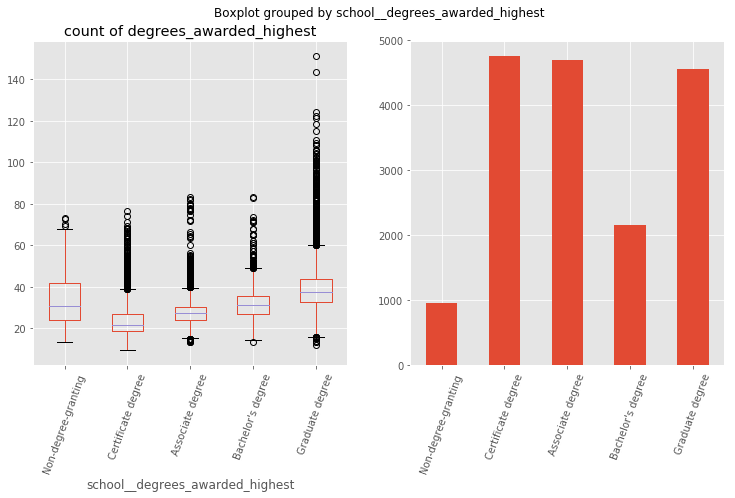

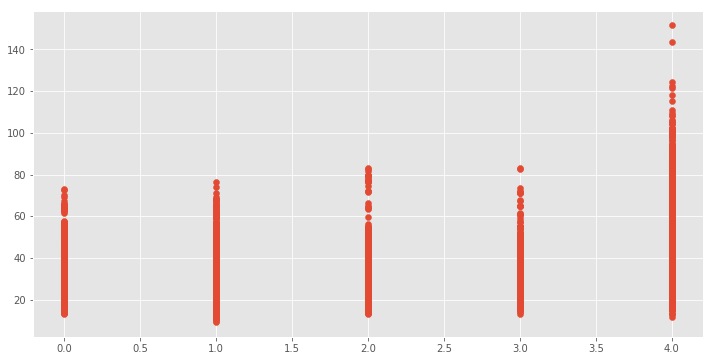

In [13]:
temp = degrees
temp['income'] = y_train.income
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)

temp.boxplot(column = 'income', by = 'school__degrees_awarded_highest', ax = ax)
plt.xticks(rotation=70)
ax.set_title('Income by Highest degree')

ax2 = fig.add_subplot(122)
school['school__degrees_awarded_highest'].value_counts(sort=False).plot(kind='bar', ax = ax2)
plt.xticks(rotation=70)
ax.set_title("count of degrees_awarded_highest")
plt.show()

temp['highest_degree_coded'] = temp['school__degrees_awarded_highest'].cat.codes
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.scatter(temp['highest_degree_coded'],temp['income'])
plt.show()

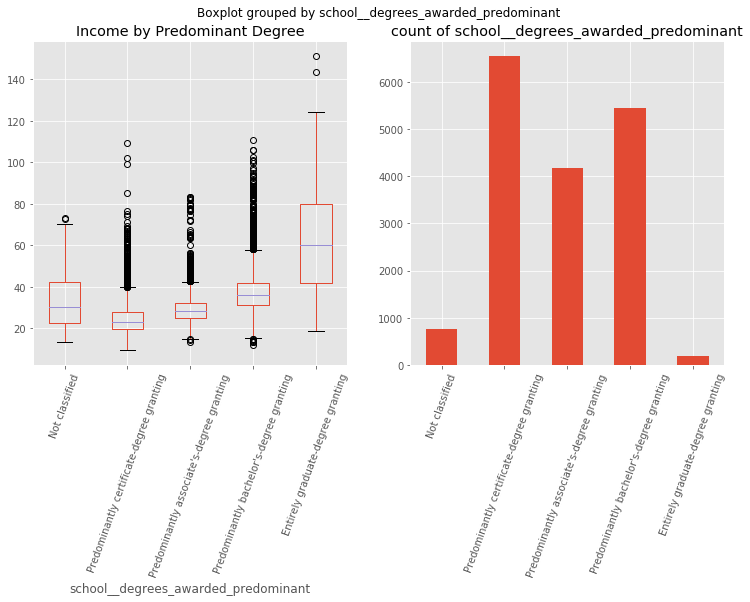

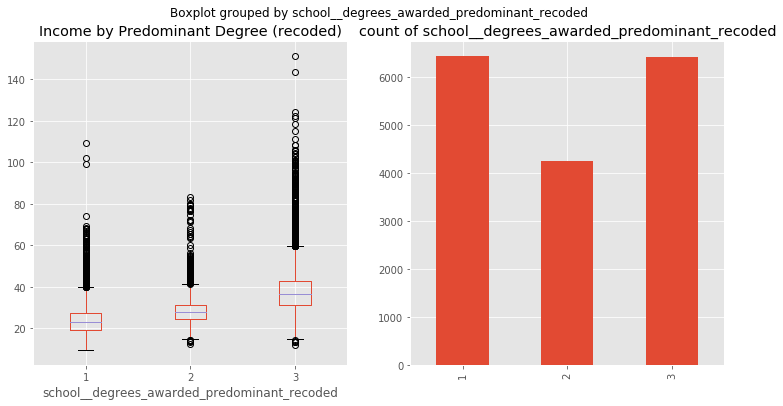

In [14]:
temp = school
temp['income'] = y_train.income

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
temp.boxplot(column = 'income', by = 'school__degrees_awarded_predominant', ax = ax)
plt.xticks(rotation=70)
ax.set_title('Income by Predominant Degree')

ax3 = fig.add_subplot(122)
temp['school__degrees_awarded_predominant'].value_counts(sort=False).plot(kind='bar', ax = ax3)
plt.xticks(rotation=70)
ax3.set_title("count of school__degrees_awarded_predominant")

fig = plt.figure(figsize=(12,6))

ax2 = fig.add_subplot(121)
temp.boxplot(column = 'income', by = 'school__degrees_awarded_predominant_recoded', ax = ax2)
ax2.set_title('Income by Predominant Degree (recoded)')

ax4 = fig.add_subplot(122)
temp['school__degrees_awarded_predominant_recoded'].value_counts(sort=False).plot(kind='bar', ax = ax4)
ax4.set_title("count of school__degrees_awarded_predominant_recoded")
plt.show()

# MODEL

In [3]:
def removeAcademics(df):
    filter_col = [col for col in df if col.startswith('academics')]
    filter_col = [col for col in filter_col if "percentage" in col]
    df = df.drop(filter_col, axis=1)
  
    return df

def removeAdmissions(df):
    filter_col = [col for col in df if col.startswith('admissions')]
    filter_col.remove('admissions__sat_scores_average_by_ope_id')
    filter_col.remove('admissions__act_scores_midpoint_cumulative')
   
    df = df.drop(filter_col, axis=1)
    return df

def removeCost(df):
    filter_col = [col for col in df if col.startswith('cost')]
    df = df.drop(filter_col, axis=1)
  
    return df

def removeCompletion(df):
    filter_col = [col for col in df if col.startswith('completion')]
    df = df.drop(filter_col, axis=1)
  
    return df


def handleCategoricalData(df):
     
    #df = df.drop('school__degrees_awarded_highest', axis=1)
    #df = df.drop('school__degrees_awarded_predominant', axis=1)
    #df = df.drop('school__state', axis=1)
    #df = df.drop('school__online_only', axis=1)
    #df = df.drop('school__region_id', axis=1)
      
    categorical = df.select_dtypes(exclude=[np.number])
    df = pd.get_dummies(df,columns=categorical.columns)
    return df
    
def prepareData(df):
    #df = df.drop('report_year', axis=1)
    
    # remove underrepresented columns
    #filterList = getLowRepresentedFeatures(X_train,0.15)
    #df = df.drop(filterList,axis=1)
    
    # remove redundante academics data
    #df = removeAcademics(df)
    
    #df = removeCost(df)
    
    #df = removeCompletion(df)
    
    # remove redundant admission
    #df = removeAdmissions(df)
    
    # add dummy columns for categorical data
    df = handleCategoricalData(df)
    
    # end by selecting just numeric features
    df = df.select_dtypes(include=[np.number])
    
    return df

In [15]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [16]:
# select columns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import math
from sklearn.model_selection import cross_val_score


X = prepareData(X_train)
y = y_train.loc[X.index,:]
y = y['income']

#param_grid = {"random_forest__n_estimators":[500],
#              "random_forest__learning_rate":[0.56],
#                "random_forest__loss":["square"]}
#estimator = Pipeline([("imputer", Imputer(strategy="mean", axis=0)), 
#                      ("scaler", StandardScaler()),
#                      ("random_forest", AdaBoostRegressor(DecisionTreeRegressor(max_features=0.3)))])

param_grid = {"random_forest__n_estimators":[500],
              "random_forest__max_features":[0.3, 0.5,1],
                "random_forest__loss":["square"]}
estimator = Pipeline([("imputer", Imputer(strategy="mean", axis=0)), 
                      ("scaler", StandardScaler()),
                      ("random_forest", ExtraTreesRegressor())])





grid = GridSearchCV(estimator, param_grid,n_jobs=-1, cv=8, scoring='neg_mean_squared_error', verbose=2)


grid.fit(X, y)

print('Best Score:', grid.best_score_) 
print('Best Params:', grid.best_params_) 

y_pred = grid.predict(X)

print("Root of Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))



Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed: 12.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 12.2min finished


Best Score: -12.9102483816
Best Params: {'random_forest__learning_rate': 0.56, 'random_forest__loss': 'square', 'random_forest__n_estimators': 500}
Root of Mean squared error: 0.25
Variance score: 1.00


In [12]:
coefs = grid.best_estimator_.named_steps['random_forest'].feature_importances_
t = pd.DataFrame()
t['feature'] = X.columns
t['coefs'] = coefs
t['weight'] = t['coefs'].apply(lambda x: math.fabs(x))
t.sort_values(by='weight', ascending=False).head(10)

,feature,coefs,weight
267,school__instructional_expenditure_per_fte,0.091973,0.091973
265,school__faculty_salary,0.085987,0.085987
268,school__tuition_revenue_per_fte,0.075119,0.075119
204,academics__program_percentage_health,0.060108,0.060108
296,school__degrees_awarded_highest_Graduate degree,0.055106,0.055106
301,school__degrees_awarded_predominant_Entirely g...,0.045421,0.045421
264,school__degrees_awarded_predominant_recoded,0.032675,0.032675
269,student__demographics_age_entry,0.020469,0.020469
270,student__demographics_dependent,0.018225,0.018225
286,student__share_independent_students,0.017035,0.017035


Feature ranking:
1. feature 301 (0.112110)
2. feature 296 (0.095697)
3. feature 267 (0.095242)
4. feature 268 (0.074665)
5. feature 265 (0.071601)
6. feature 264 (0.052790)
7. feature 204 (0.048267)
8. feature 215 (0.028451)
9. feature 283 (0.020921)
10. feature 270 (0.020211)
11. feature 286 (0.019403)
12. feature 269 (0.019318)
13. feature 271 (0.017717)
14. feature 306 (0.017385)
15. feature 287 (0.012847)
16. feature 272 (0.012650)
17. feature 282 (0.011784)
18. feature 305 (0.011766)
19. feature 240 (0.009673)
20. feature 266 (0.009292)
21. feature 273 (0.008355)
22. feature 285 (0.007464)
23. feature 199 (0.006940)
24. feature 364 (0.006641)
25. feature 303 (0.006405)
26. feature 262 (0.006016)
27. feature 298 (0.005867)
28. feature 192 (0.005792)
29. feature 312 (0.005668)
30. feature 227 (0.005318)
31. feature 253 (0.005134)
32. feature 274 (0.005076)
33. feature 243 (0.005062)
34. feature 275 (0.005026)
35. feature 261 (0.004878)
36. feature 193 (0.004708)
37. feature 321 (0.0

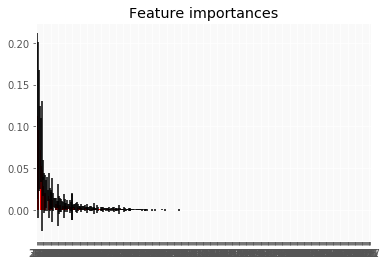

In [9]:
importances = coefs
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.named_steps['random_forest'].estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
test_temp = prepareData(X_test)
test_results = grid.predict(test_temp)

T = pd.DataFrame(test_results)
T.columns = ['income']
T.to_csv('NewResults.csv')

### REALLY IMPORTANT FEATURES:
- school__degrees_awarded_predominant_recoded
- school__faculty_salary
- school__instructional_expenditure_per_fte
- student__demographics_first_generation
- student__demographics_female_share
- student__demographics_dependent
- student__demographics_age_entry